In terms of implementation using decision trees, there is very little difference between classification and regression. The only notable difference is that our targets are classes rather than Real Values. In regression, we measure accuracy by looking at the size of the differences between the predicted values and the actual values. In contrast, in classification problems a prediction can either be correct or incorrect. This makes measuring the accuracy of our model a lot simpler. We will be using a set of features derived from fitting images according to known galaxy profiles.

In [7]:
import numpy as np 
data = np.load('galaxy_catalogue.npy')

for name, value in zip(data.dtype.names, data[25]): #for the first galaxy
  print('{:10} {:.6}'.format(name, value))
#shows color indices, fourth moment, eccentricity and petrosian fluxes 

u-g        2.20417
g-r        0.83936
r-i        0.39916
i-z        0.31316
ecc        0.933152
m4_u       1.78047
m4_g       2.15193
m4_r       2.1945
m4_i       2.17751
m4_z       2.1877
petroR50_u 1.01926
petroR50_r 1.1146
petroR50_z 1.10485
petroR90_u 1.64495
petroR90_r 2.20766
petroR90_z 2.15178
class      merger


In [ ]:

import numpy as np
data = np.load('galaxy_catalogue.npy')

np.random.seed(0)  

def splitdata_train_test(data, fraction_training):
  np.random.shuffle(data)  
  split = int(fraction_training*len(data))
  return data[:split] , data[split:]

fraction_training = 0.7

training, testing = splitdata_train_test(data, fraction_training)

print('Number data galaxies:', len(data))
print('Train fraction:', fraction_training)
print('Number of galaxies in training set:', len(training))
print('Number of galaxies in testing set:', len(testing))


Number data galaxies: 780
Train fraction: 0.7
Number of galaxies in training set: 546
Number of galaxies in testing set: 234


In [ ]:
import numpy as np


def generate_features_targets(data):
  targets = data['class']

  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']
  # concentration in u filter
  features[:, 10] = data['petroR50_u']/data['petroR90_u']
  # concentration in r filter
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  # concentration in z filter
  features[:, 12] = data['petroR50_z']/data['petroR90_z']

  return features, targets

data = np.load('galaxy_catalogue.npy')

features, targets = generate_features_targets(data)

#Print the shape of each array to check the arrays are the correct dimensions. 
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)


Features shape: (780, 13)
Targets shape: (780,)


In [ ]:

import numpy as np
from sklearn.tree import DecisionTreeClassifier

def splitdata_train_test(data, fraction_training):
  np.random.seed(0)
  np.random.shuffle(data)  
  split = int(fraction_training*len(data))
  return data[:split] , data[split:]

def generate_features_targets(data):
  targets = data['class']

  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g'] + 1
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']

  features[:, 10] = data['petroR50_u']/data['petroR90_u']

  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  
  features[:, 12] = data['petroR50_z']/data['petroR90_z']

  return features, targets

#training an actual classifier
def dtc_predict_actual(data):
  #splitting according to the training fraction
  train , test = splitdata_train_test(data , 0.7)
  train_features, train_targets = generate_features_targets(train)
  test_features, test_targets = generate_features_targets(test)
 
# instantiate a decision tree classifier
  dtc = DecisionTreeClassifier()
  dtc.fit(train_features, train_targets)
  predictions = dtc.predict(test_features)
  
  return predictions, test_targets


data = np.load('galaxy_catalogue.npy')
    
predicted_class, actual_class = dtc_predict_actual(data)

#initial results of the applied model.
print("Some initial results...\n   predicted,  actual")
for i in range(15):
  print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))
 

Some initial results...
   predicted,  actual
0. merger, merger
1. merger, merger
2. elliptical, elliptical
3. elliptical, elliptical
4. spiral, spiral
5. merger, spiral
6. merger, spiral
7. merger, spiral
8. merger, merger
9. merger, merger
10. elliptical, elliptical
11. spiral, spiral
12. spiral, merger
13. spiral, spiral
14. elliptical, elliptical


Our accuracy score: 0.7884615384615384
Confusion matrix, without normalization
[[233  22   5]
 [ 26 180  54]
 [  5  53 202]]


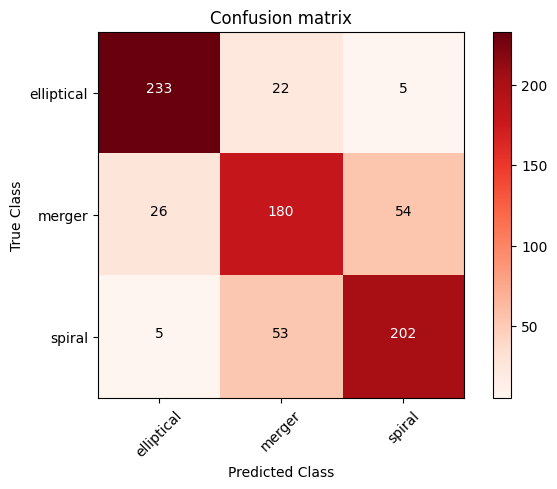

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from support_functions import plot_confusion_matrix, generate_features_targets

# Implement the following function
def calculate_accuracy(predicted, actual):
  return sum(predicted == actual)/len(actual)

data = np.load('galaxy_catalogue.npy')


features, targets = generate_features_targets(data)

dtc = DecisionTreeClassifier()
predicted = cross_val_predict(dtc, features, targets, cv=10)

# calculate the model score 
model_score = calculate_accuracy(predicted, targets)
print("Accuracy score:", model_score)

# calculate the models confusion matrix using sklearns confusion_matrix function
class_labels = list(set(targets))
model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)

# Plot the confusion matrix using the provided functions.
plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels, normalize=False , cmap=plt.cm.Red)
plt.show()


A random forest is a collection of decision trees that have each been independently trained using different subsets of the training data and/or different combinations of features in those subsets.

When making a prediction, every tree in the forest gives its own prediction and the most common classification is taken as the overall forest prediction (in regression the mean prediction is used).

The subsets are created by taking random samples with replacement. This means that a given data point can be used in several subsets. (This is different from the subsets used in cross validation where each data point belongs to one subset).

Accuracy score: 0.8589743589743589
Confusion matrix, without normalization
[[207  37  16]
 [ 40 218   2]
 [ 14   1 245]]


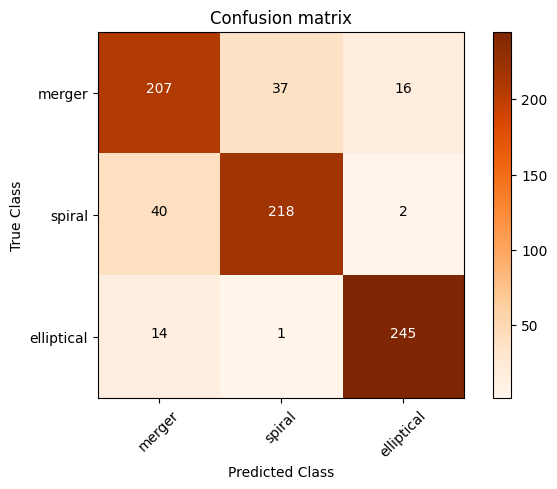

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from support_functions_2 import generate_features_targets, plot_confusion_matrix, calculate_accuracy

def rfc_predict_actual(data, n_estimators):

  features, targets = generate_features_targets(data)
  # instantiate a random forest classifier using n estimators
  rfc = RandomForestClassifier(n_estimators = n_estimators)
  
  predicted = cross_val_predict(rfc, features, targets, cv=10)
  # return the predictions and their actual classes
  return predicted , targets


data = np.load('galaxy_catalogue.npy')

number_estimators = 50              # Number of trees
predicted, actual = rfc_predict_actual(data, number_estimators)

# calculate the model score using your function
accuracy = calculate_accuracy(predicted, actual)
print("Accuracy score:", accuracy)


class_labels = list(set(actual))
model_cm = confusion_matrix(y_true=actual, y_pred=predicted, labels=class_labels)

plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels, normalize=False, cmap= plt.cm.Oranges)
plt.show()
